In [1]:
from keras.applications.vgg19 import VGG19
from matplotlib import pyplot as plt
from keras.models import Model
import numpy as np

In [2]:
vgg19 = VGG19(weights='imagenet',include_top=False,input_shape=(224,224,3))
vgg19_short = Model(vgg19.input, vgg19.layers[-2].output)
vgg19_short.summary()

2022-03-22 14:36:59.888119: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


80150528/80134624 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [3]:
# valid_conv_layers_of_vgg_199 = [1, 2, 4, 5, 7, 8, 9, 10, 12, 13, 14, 15, 17, 18, 19, 20]
index = 1
filters, biases = vgg19.layers[index].get_weights()
print('Layer name:', vgg19.layers[index].name,'\nLayer shape', filters.shape)

Layer name: block1_conv1 
Layer shape (3, 3, 3, 64)


# What *filters* variable contains?
> filters[:, :, :, :] = [rows, cols, n_Prev_dim, filters] = (3, 3, 3, 64)

# What would be output of current layer 
> Output dimensions = (img_heigh, img_width, 64)

# 64 filters of block1_conv1's first dimenstion(out of 3)(e.g. for Red channel)

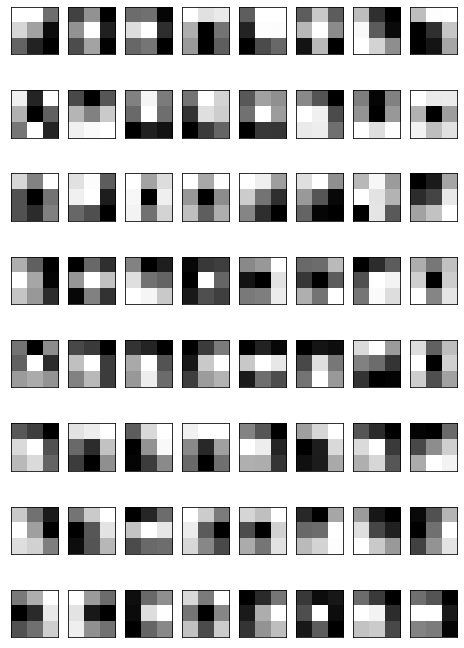

In [4]:
fig1=plt.figure(figsize=(8, 12))
columns = 8
rows = 8
n_filters = columns * rows
for i in range(n_filters):
    f = filters[:, :, :, i]
    fig1 = plt.subplot(rows, columns, i+1)
    fig1.set_xticks([])
    fig1.set_yticks([])
    plt.imshow(f[:, :, 0], cmap='gray')
plt.show()

# Block1_conv1's first filter of size (3, 3, 3)(Because input channel has 3 layers)

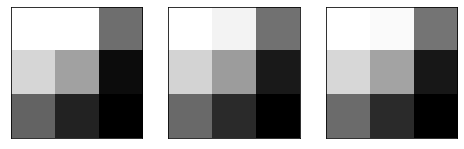

In [5]:
fig=plt.figure(figsize=(8, 8))
f = filters[:, :, :, 0] # extracting 1st filter from 64 filters | f.shape = (3, 3, 3)

for i in range(3):
    fig = plt.subplot(1, 3, i+1)
    fig.set_xticks([])
    fig.set_yticks([])
    plt.imshow(f[:, :, i], cmap='gray')